# Image Filtering in Frequency Domain

By: Denny Alvito Ginting

For Low Pass Filter and High Pass Filter
Picture was taken from : https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.wallpaperuse.com%2Fvien%2FoiRJRo%2F&psig=AOvVaw33frV7vtXYpYYgr0M29S2b&ust=1666190286042000&source=images&cd=vfe&ved=0CA0QjRxqFwoTCOi9g9OA6voCFQAAAAAdAAAAABAO

For Noisy Image
Picture was taken from : https://docs.opencv.org/4.x/d2/d0b/tutorial_periodic_noise_removing_filter.html

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

## Importing Image

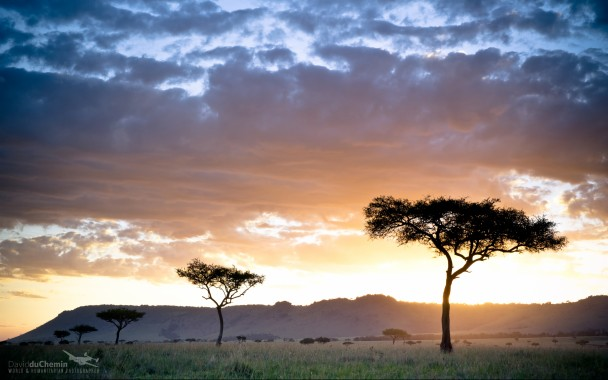

In [ ]:
image = cv2.imread('/content/fourier_transform_pic.jpg')
cv2_imshow(image)

> Before we perform further action, let's transform the image to gray-scaled picture

## Gray Scaling Image

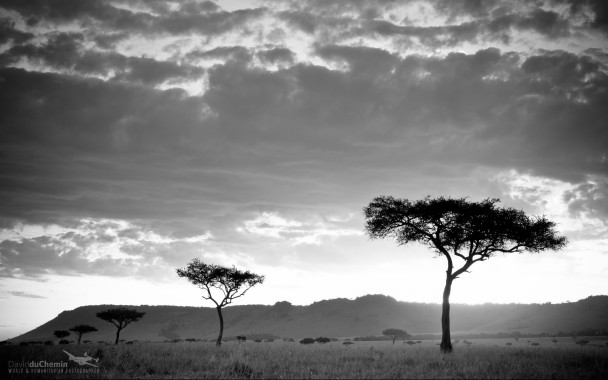

In [ ]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(grayscale)

## Low Pass Filtering Process (Smoothening Image)

### Transforming Image to Frequency Domain

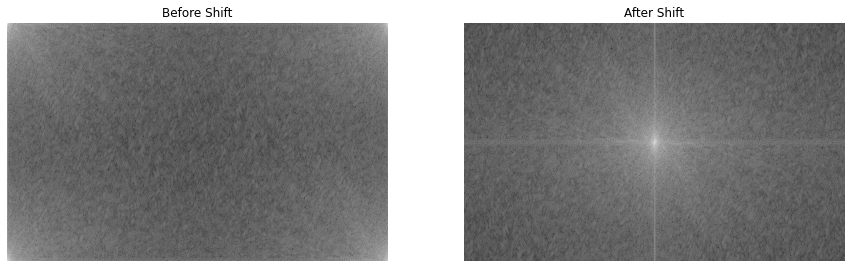

In [ ]:
# Transform Image with Fourier Transform
ft_image = np.fft.fft2(grayscale)

# Shift the low frequency from the corner to center
ft_shift = np.fft.fftshift(ft_image)

# Visualizing the frequency domain
plt.figure(figsize=(15,10))

# Before shift
plt.subplot(1,2,1)
plt.imshow(np.log1p(np.abs(ft_image)), cmap='gray')
plt.title('Before Shift')
plt.axis('off')

# After shift
plt.subplot(1,2,2)
plt.imshow(np.log1p(np.abs(ft_shift)), cmap='gray')
plt.title('After Shift')
plt.axis('off')

plt.show()

### Gaussian Filter (Filter H)

In [ ]:
def gaussian_filter(image, filter_type='low'):
  M,N = image.shape
  H = np.zeros((M,N), dtype=np.float32)
  D0 = 10
  for i in range(M):
    for j in range(N):
      D = np.sqrt((i-M/2)**2 + (j-N/2)**2)
      H[i,j] = np.exp(-D**2/(2*D0*D0))
  
  return H if filter_type == 'low' else (1-H)

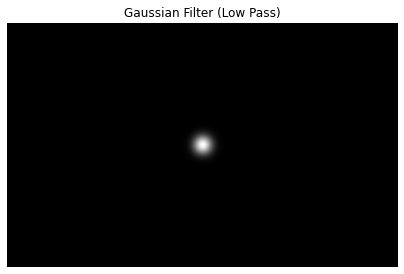

In [ ]:
low_pass = gaussian_filter(grayscale, 'low')

plt.figure(figsize=(7,7))
plt.imshow(low_pass, cmap='gray')
plt.title('Gaussian Filter (Low Pass)')
plt.axis('off')
plt.show()

### Convolution

In [ ]:
def convolution(ft_shifted, filter_h):
  
  # Convolution
  conv = ft_shifted * filter_h

  # Shifting back frequency from center to corner
  shifted_back = np.fft.ifftshift(conv)

  # Inverse Fourier Transformed Image
  img = np.abs(np.fft.ifft2(shifted_back))

  return conv, shifted_back, img

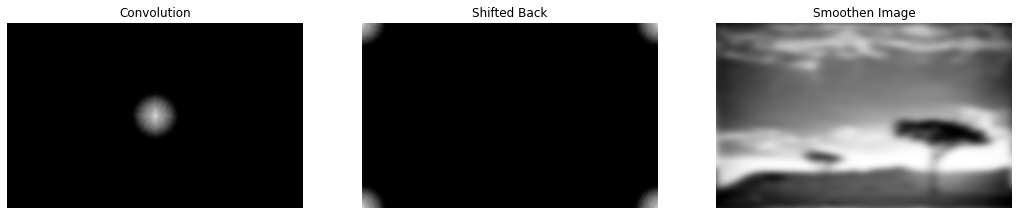

In [ ]:
conv, shifted_back, img = convolution(ft_shift, low_pass)

plt.figure(figsize=(18,15))

# Convolution
plt.subplot(1,3,1)
plt.imshow(np.log1p(np.abs(conv)), cmap='gray')
plt.axis('off')
plt.title('Convolution')

# Shifting Back
plt.subplot(1,3,2)
plt.imshow(np.log1p(np.abs(shifted_back)), cmap='gray')
plt.axis('off')
plt.title('Shifted Back')

# Smoothen Image
plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Smoothen Image')

plt.show()

## High Pass Filtering Process (Sharpening Image)

### Transforming Image to Frequency Domain

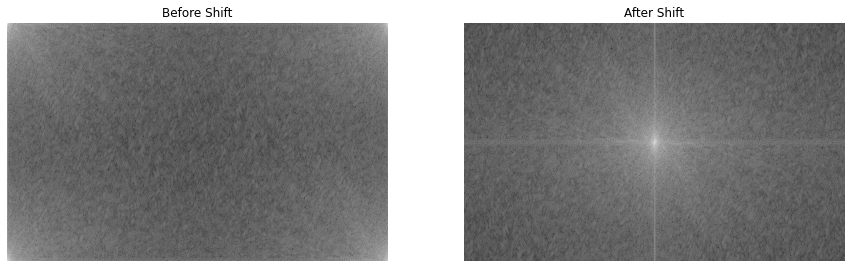

In [ ]:
# Transform Image with Fourier Transform
ft_image = np.fft.fft2(grayscale)

# Shift the low frequency from the corner to center
ft_shift = np.fft.fftshift(ft_image)

# Visualizing the frequency domain
plt.figure(figsize=(15,10))

# Before shift
plt.subplot(1,2,1)
plt.imshow(np.log1p(np.abs(ft_image)), cmap='gray')
plt.title('Before Shift')
plt.axis('off')

# After shift
plt.subplot(1,2,2)
plt.imshow(np.log1p(np.abs(ft_shift)), cmap='gray')
plt.title('After Shift')
plt.axis('off')

plt.show()

### Gaussian Filter (Filter H)

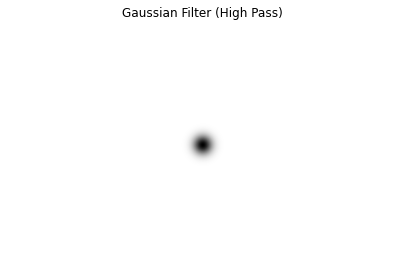

In [ ]:
high_pass = gaussian_filter(grayscale, 'high')

plt.figure(figsize=(7,7))
plt.imshow(high_pass, cmap='gray')
plt.title('Gaussian Filter (High Pass)')
plt.axis('off')
plt.show()

### Convolution

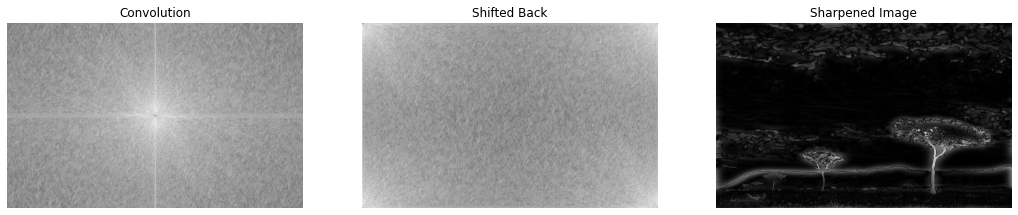

In [ ]:
conv, shifted_back, img = convolution(ft_shift, high_pass)

plt.figure(figsize=(18,15))

# Convolution
plt.subplot(1,3,1)
plt.imshow(np.log1p(np.abs(conv)), cmap='gray')
plt.axis('off')
plt.title('Convolution')

# Shifting Back
plt.subplot(1,3,2)
plt.imshow(np.log1p(np.abs(shifted_back)), cmap='gray')
plt.axis('off')
plt.title('Shifted Back')

# Smoothen Image
plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Sharpened Image')

plt.show()

## Butterworth Notch Filter (Remove Repetitive Noise)

## Importing Noisy Image

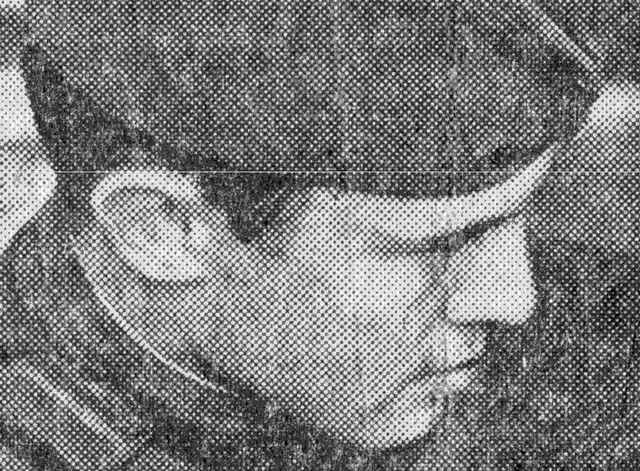

In [10]:
image = cv2.imread('/content/noisy_img.png')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

## Notch Reject Filter

In [11]:
def notch_reject_filter(img, d0=10, i_k=0, j_k=0):
  M,N = img.shape
  H = np.zeros((M,N))

  # Iterate through the filter
  for i in range(M):
    for j in range(N):
      D_ij = np.sqrt((i-M/2 + i_k)**2 + (j-N/2 + j_k)**2)
      D_mij = np.sqrt((i-M/2 - i_k)**2 + (j-N/2 - j_k)**2)

      # Filter Condition
      if D_ij <= d0 or D_mij <= d0:
        H[i,j] = 0.0
      else:
        H[i,j] = 1.0
  
  return H

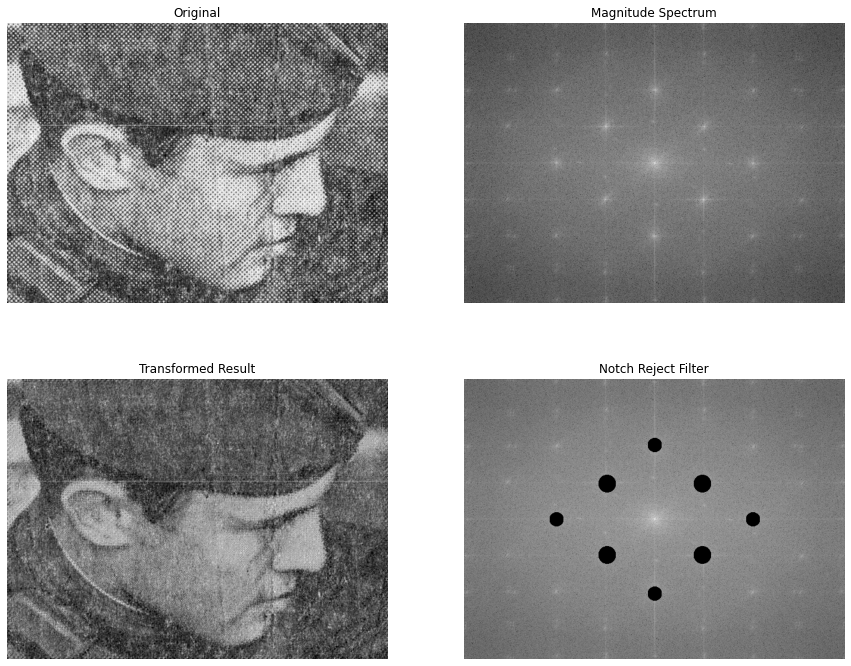

In [46]:
# Transform Image with Fourier Transform
ft_image = np.fft.fft2(grayscale)

# Shift the low frequency from the corner to center
ft_shift = np.fft.fftshift(ft_image)

# Creating Spectrum
p_spectrum = np.angle(ft_shift)
m_spectrum = 20*np.log(np.abs(ft_shift))

H1 = notch_reject_filter(grayscale, 15, 60, 80)
H2 = notch_reject_filter(grayscale, 15, -60, 80)
H3 = notch_reject_filter(grayscale, 12, 0, 165)
H4 = notch_reject_filter(grayscale, 12, 125, 0)

# Apply Notch Filter
n_filter = H1*H2*H3*H4
centred_filter = ft_shift * n_filter
shifted_back = np.fft.ifftshift(centred_filter)
inversed_ift = np.fft.ifft2(shifted_back)

img_result = np.abs(inversed_ift)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.imshow(grayscale, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(m_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(m_spectrum*n_filter, cmap='gray')
plt.title('Notch Reject Filter')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_result, cmap='gray')
plt.title('Transformed Result')
plt.axis('off')
plt.show()

> As we can see, the transformed image is better than previous image (repetitive noised image), this process works by looking at the fourier transformed original image, and then we will try try to filter the repetitive noise, and then, we can achieve the better image.